# **<h3 align="center">Machine Learning - Wizard School Project</h3>**
**Group members:**<br>
Maria Inês Gonçalves Rodrigues - 20221938<br>
Patrícia Salgueiro Bezerra - 20221907 <br>
Rita Maria Gomes Silva - 20221920 <br>
Vasco Miguel Teixeira Capão - 20221906<br>


# Index:

1. **Library Imports**

2. **Overview of the Training Dataset**

3. **Features Analysis**
   - 3.1 Outliers Check
   - 3.2 Missing Values
   - 3.3 Feature Selection
      - 3.3.1 Numerical Features
      - 3.3.2 Categorical Features
   - 3.4 Encoding
      - 3.4.1 Binary Label Encoding
      - 3.4.2 One-hot Encoding
   - 3.5 Correlation Between Features

4. **Model Selection**
   - 4.1 Random Forest Classifier
      - 4.1.1 Randomized Search
   - 4.2 Neural Network Classifier
      - 4.2.1 Randomized Search
   - 4.3 Grid Search Random Forest
   - 4.4 Grid Search MLP

5. **Test Dataset Analysis**

6. **Final Model and Kaggle Submission**


# Imports

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the dataset into training and validation sets
from sklearn.model_selection import train_test_split

# Feature selection
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Encoding categorical labels into numerical format
from sklearn.preprocessing import LabelEncoder

# Calculating cross-validation scores
from sklearn.model_selection import StratifiedKFold, cross_val_score

# KNN-based imputation for handling missing values
from sklearn.impute import KNNImputer

# Data scaling techniques for standardization, robust scaling, and normalization
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Importing different classifiers for machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Repeated Stratified K-Fold cross-validator for model evaluation
from sklearn.model_selection import RepeatedStratifiedKFold

# Importing evaluation metrics such as confusion matrix, accuracy score, and F1 score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report


# Randomized hyperparameter search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint


# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Importing the tqdm library for creating progress bars to track lengthy operations
from tqdm.notebook import tqdm

In [ ]:
# Importing the Train dataset
train_df = pd.read_csv('Project_train_dataset.csv')

In [ ]:
# Displaying the first five rows of the TRAINING dataset
train_df.head()

,Student ID,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
0,1,Sorcery School,male,22.0,1,0,7.2500,NaN,Mystic Academy,18,Fire,0
1,2,Magi Academy,female,38.0,1,0,71.2833,Cottage Chamber,Eldertree Enclave,7,Fire,1
2,3,Sorcery School,female,26.0,0,0,7.9250,NaN,Mystic Academy,12,Air,1
3,5,Sorcery School,male,35.0,0,0,8.0500,NaN,Mystic Academy,12,Air,0
4,6,Sorcery School,male,NaN,0,0,8.4583,NaN,Arcan Institute,11,Earth,0


In [ ]:
# Create a copy of the DataFrame 'train_df' and assign it to the variable 'train_data'
train_data = train_df.copy()

In [ ]:
# Setting 'Student ID' as the index for the training dataset
train_data.set_index('Student ID', inplace=True)

## >> Overview of the TRAIN dataset

In a machine learning project, understanding the characteristics and quality of the dataset is crucial. The dataframe_summary function serves as an exploratory data analysis (EDA) tool, providing a quick and informative summary of the dataset.

In [ ]:
def dataframe_summary(dataframe):
    # Displaying the shape of the dataset
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")
    print("SHAPE of Dataset -----------------------------------------------------------------------------------------------------------------------")
    print(dataframe.shape)

    # Displaying data types of columns in the dataset
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")
    print("DATA TYPES of Dataset ------------------------------------------------------------------------------------------------------------------")
    print(dataframe.dtypes)

    # Displaying the count of missing values in the dataset
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")
    print("MISSING VALUES in Dataset --------------------------------------------------------------------------------------------------------------")
    print(dataframe.isnull().sum())

    # Displaying descriptive information about categorical columns in the dataset
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")
    print("DESCRIPTIVE Info about Dataset ---------------------------------------------------------------------------------------------------------")
    print(dataframe.describe(include='O').T)

    # Displaying general descriptive statistics about the dataset
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")
    print(dataframe.describe().T)

    # Check if there are any of the numerical variables univariate
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")
    print('CHECK if there are any of the numerical variables univariate--------------------------------------------------------------------------------------')
    print(dataframe.var())

In [ ]:
dataframe_summary(train_data)

-------------------------------------------------------------------------------------------------------------------------------------------------
SHAPE of Dataset -----------------------------------------------------------------------------------------------------------------------
(713, 11)
-------------------------------------------------------------------------------------------------------------------------------------------------
DATA TYPES of Dataset ------------------------------------------------------------------------------------------------------------------
Program                      object
Student Gender               object
Experience Level            float64
Student Siblings              int64
Student Family                int64
Financial Background        float64
School Dormitory             object
School of Origin             object
Student Social Influence      int64
Favourite Study Element      object
Admitted in School            int64
dtype: object
--------------


Upon exploring the data types, it is observed that almost an equal number of variables are numerical and categorical. The "Experience Level" variable has 146 missing values, and "School Dormitory" has 560 absences. In the context of descriptive statistics, the mean of "Experience Level" is 29.89, with a standard deviation of 14.60.
Interestingly, the "Financial Background" variable shows an average of 31.33, but with a significant standard deviation of 50.90, suggesting considerable variability in the numerical values.

# Features

## >> Features Analysis

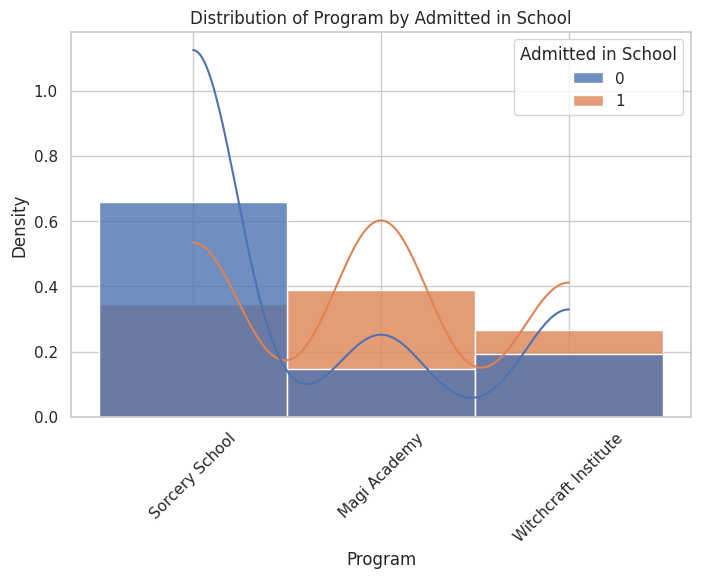

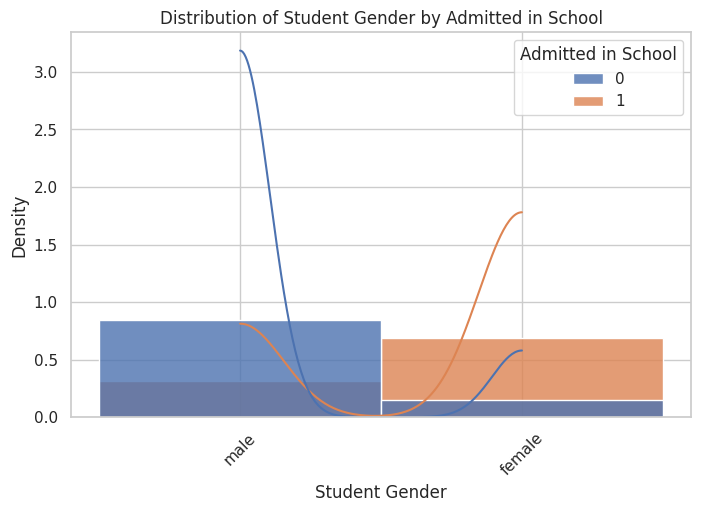

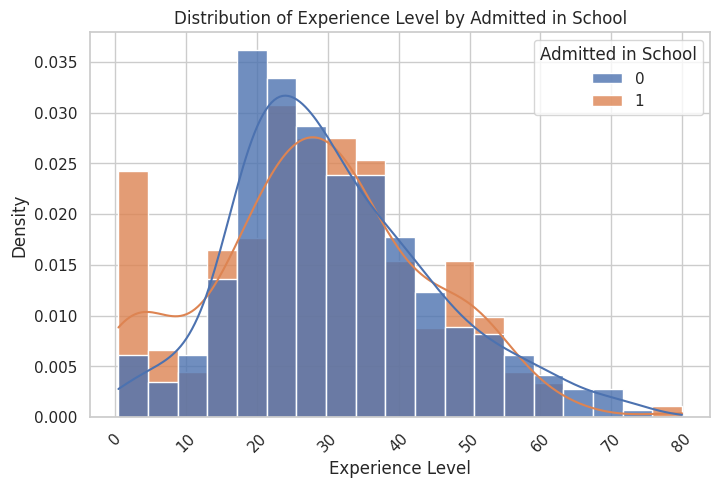

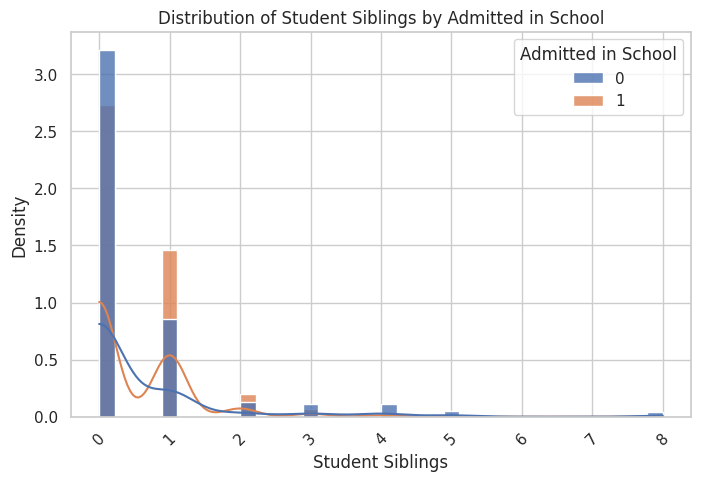

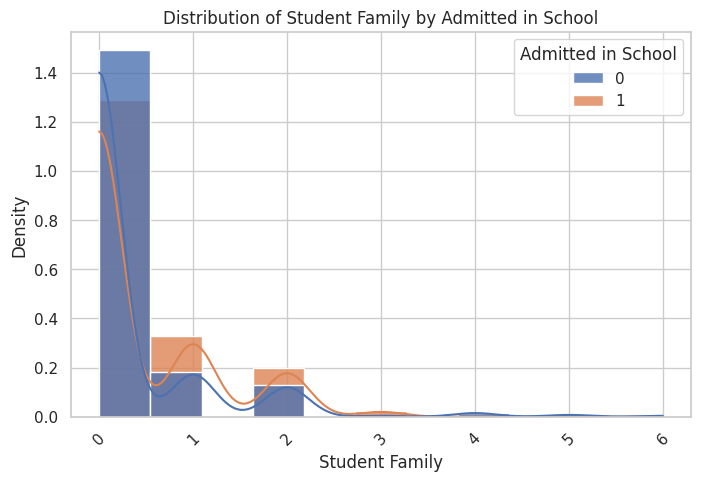

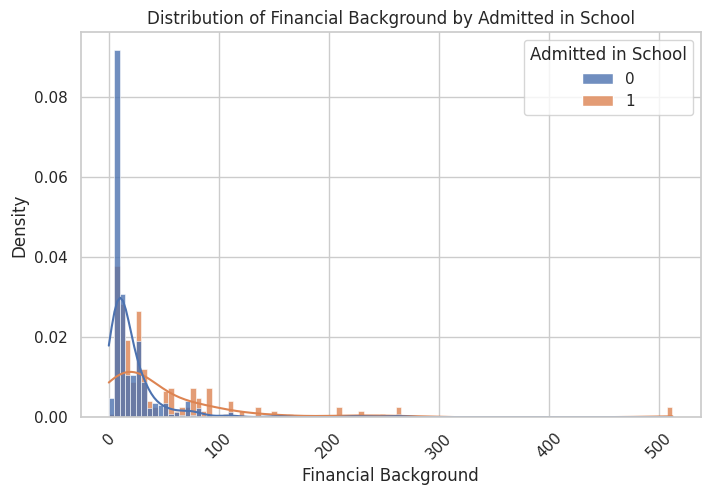

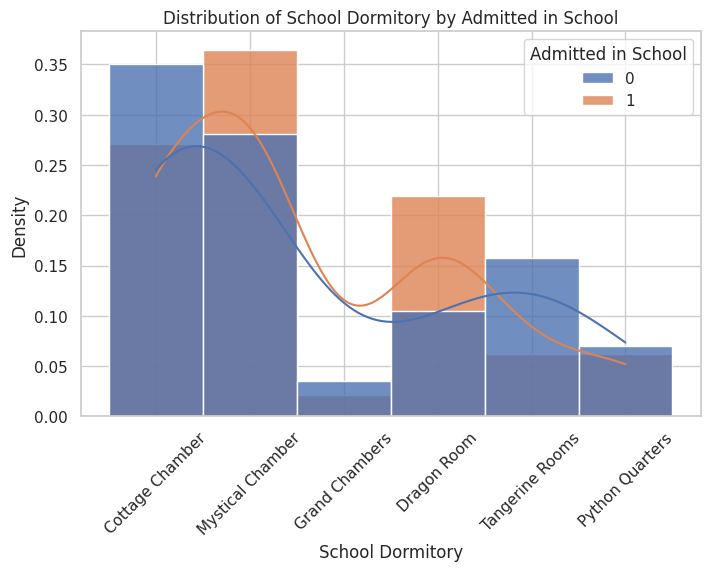

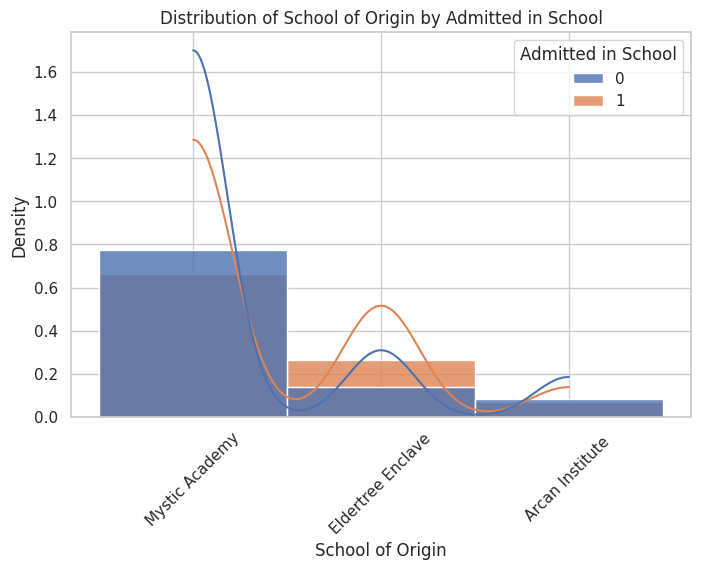

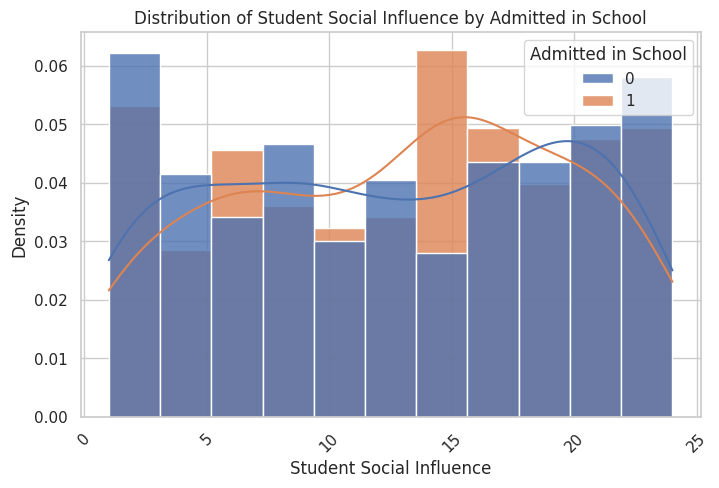

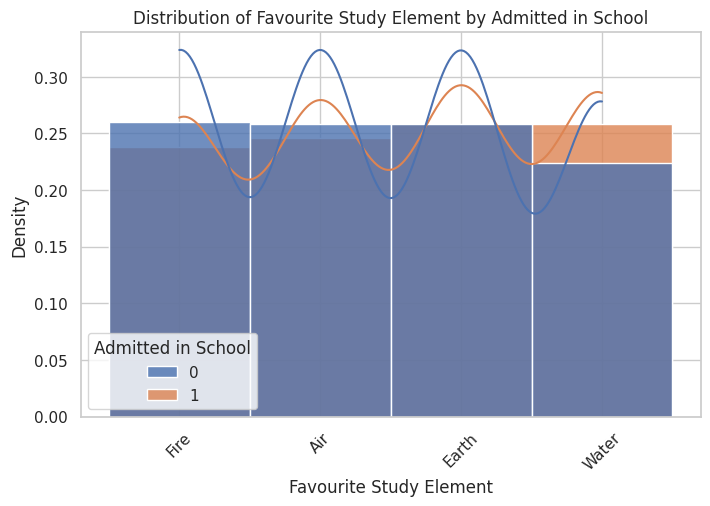

In [ ]:
# Set the style of seaborn for better aesthetics (whitegrid style)
sns.set(style="whitegrid")

# Iterate over each column in the DataFrame, excluding the last column
for i in train_data.columns[:-1]:
    # Create a new figure with a specified size
    plt.figure(figsize=(8, 5))

    # Create a histogram using Seaborn
    sns.histplot(data=train_data, x=i, hue="Admitted in School", alpha=0.8, stat="density", common_norm=False, kde=True)
    # Rotate x-axis labels by 45 degrees for better visualization
    plt.xticks(rotation=45)
    # Add a title to the plot
    plt.title(f"Distribution of {i} by Admitted in School")
    # Display the plot
    plt.show()

> Here we compare the target feature _Admitted in School_ with the other features. Analyzing these graphics we can conclude that the feature _Admitted in School_ almost doesn't affect these other features, as the distribution when _Admitted in School_ is 0 and when it is 1 almost doesn't change.

## >> Check Outliers

Our analysis will now shift its focus to the exploration of outliers in the dataset using boxplots. Boxplots provide a visual representation of the distribution of data, allowing us to easily identify any observations that fall significantly outside the norm.

![Alt text](https://i.postimg.cc/zfw3WT7B/boxplot.png)


Separating the data into distinct training and validation sets ensures that information from the testing set doesn't inadvertently influence the model during training. This prevents data leakage, maintaining the integrity of our analysis.

In [ ]:
X = train_data.drop('Admitted in School',axis=1)
y =train_data[['Admitted in School']]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,
                                                  test_size = 0.2,
                                                  random_state = 42,
                                                  stratify = y,
                                                  shuffle = True)

In [ ]:
# Function to calculate outlier thresholds
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    # Calculate the IQR of the column
    IQR = dataframe[col_name].quantile(q3) - dataframe[col_name].quantile(q1)

    # Calculate the outlier thresholds
    lower_threshold = dataframe[col_name].quantile(q1) - 1.5*IQR
    upper_threshold = dataframe[col_name].quantile(q3) + 1.5*IQR

    return lower_threshold, upper_threshold

# Function to check if outliers exist in a column
def check_if_outlier_exists(dataframe, column_name, q1=0.25, q3=0.75):
    # Get the lower and upper thresholds for outliers
    low_limit, up_limit = outlier_thresholds(dataframe, column_name, q1, q3)
    # Count the number of lower outliers
    lower_outliers = len(dataframe[dataframe[column_name] < low_limit])
    # Count the number of upper outliers
    upper_outliers = len(dataframe[dataframe[column_name] > up_limit])
    # Calculate the total number of outliers
    total_outliers = lower_outliers + upper_outliers
    # Check if any outliers exist and print the result
    if total_outliers > 0:
        print(f"{column_name} : {total_outliers} outliers exist based on Q1={q1} and Q3={q3}")
    else:
        print(f"{column_name} : No Outlier based on Q1={q1} and Q3={q3}")

In [ ]:
num_cols = ['Experience Level', 'Student Siblings', 'Student Family', 'Financial Background','Student Social Influence']
#TRAIN DATASET
# Looping through each column in the list of numerical columns
for column in num_cols:
    # Checking if outliers exist in the current column using default quantiles (q1=0.25, q3=0.75)
    check_if_outlier_exists(X_train, column)

Experience Level : 5 outliers exist based on Q1=0.25 and Q3=0.75
Student Siblings : 35 outliers exist based on Q1=0.25 and Q3=0.75
Student Family : 131 outliers exist based on Q1=0.25 and Q3=0.75
Financial Background : 68 outliers exist based on Q1=0.25 and Q3=0.75
Student Social Influence : No Outlier based on Q1=0.25 and Q3=0.75


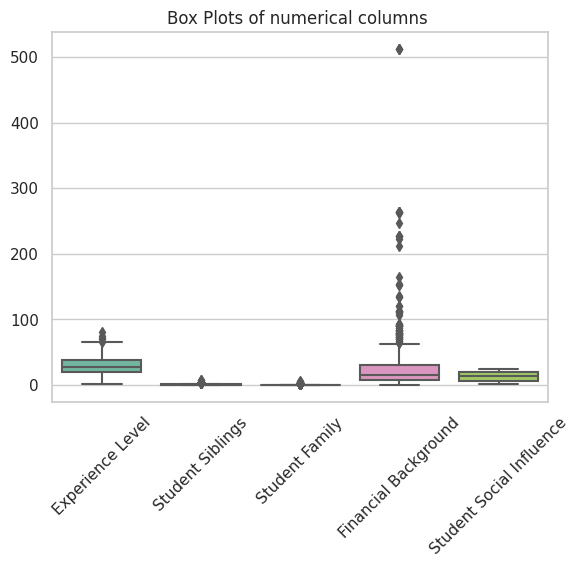

In [ ]:
# Create a new figure
plt.figure()
# Create a boxplot for each numerical variable in the dataset
sns.boxplot(data=X_train[num_cols], palette="Set2")
# Set the title of the plot
plt.title('Box Plots of numerical columns ')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Display the plot
plt.show()

The next cell is a concise way to quickly inspect and understand the unique values present in each numerical column of the training set.

In [ ]:
for column in num_cols:
  print(column)
  print(X_train[column].unique())
  print()

Experience Level
[47.   36.   49.   24.   26.     nan 27.   34.    3.   25.   64.   21.
 32.5  22.   45.   33.   30.   19.   31.   41.    9.   18.   28.   29.
 17.    7.   50.   63.   15.   20.   23.   56.   30.5  55.   42.   54.
 11.   13.   39.   37.   32.    4.   35.   38.   16.    1.   57.   44.
 51.   52.    2.   45.5  58.   60.    0.75 23.5   5.   14.   48.   14.5
 71.   40.   36.5  65.    8.   43.    6.   20.5   0.92 46.   74.   80.
 70.    0.83 66.   62.   61.   10.   55.5 ]

Student Siblings
[0 1 8 3 4 2 5]

Student Family
[0 1 4 2 3 5 6]

Financial Background
[ 25.5875 512.3292  89.1042  13.      10.5     56.4958  30.5     15.9
   7.225   21.     263.      27.7208   7.925  151.55    69.55    14.5
  26.       7.65    25.4667  14.4583  16.1     15.5      7.75     7.25
   7.8958 164.8667  41.5792   5.       8.05   113.275   20.2125  14.4542
  20.525   30.       7.775   24.      24.15    69.3      9.4833  31.
   7.55     0.       8.6625  29.125    9.5      7.7375   9.5875   7.229

Outliers are evident in Experience Level and Financial Background, despite other features displaying outliers in boxplots, a closer examination of unique values suggests otherwise.
In our quest for precision, we'll employ winsorization to address outliers in these two features. Winsorization is a statistical technique used to mitigate the impact of outliers by replacing extreme values with less extreme ones

In [ ]:
# Function to winsorize a specific column in a DataFrame
def winsorize_with_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    # Get the lower and upper thresholds for winsorization
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)

    # Winsorize the values below the lower threshold
    dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit

    # Winsorize the values above the upper threshold
    dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [ ]:
num_cols2 = ['Experience Level', 'Financial Background']
# Winsorize each numerical column in the list
for col in num_cols2:
    winsorize_with_thresholds(X_train, col)

In [ ]:
# Apply the same transformation to the X_val dataset
for col in num_cols2:
    winsorize_with_thresholds(X_val, col)

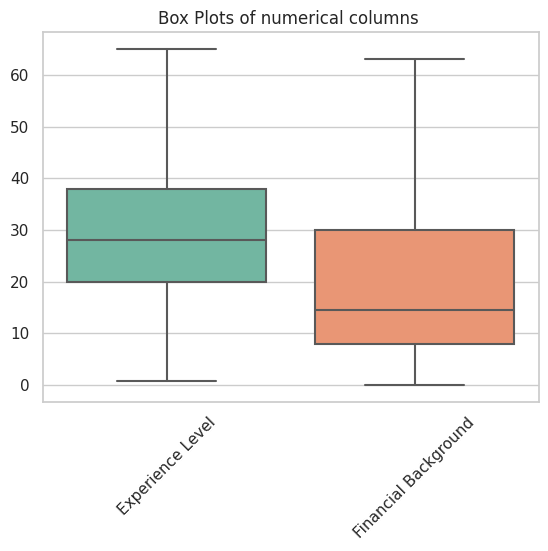

In [ ]:
# Create a new figure
plt.figure()
# Create a boxplot for each numerical variable in the dataset
sns.boxplot(data=X_train[num_cols2], palette="Set2")
# Set the title of the plot
plt.title('Box Plots of numerical columns ')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Display the plot
plt.show()

## >> Missing Values

In [ ]:
X_train.isnull().sum()

Program                       0
Student Gender                0
Experience Level            121
Student Siblings              0
Student Family                0
Financial Background          0
School Dormitory            453
School of Origin              0
Student Social Influence      0
Favourite Study Element       0
dtype: int64

As revealed by the previous cell, the training dataset indicates the presence of 121 missing values in the 'Experience Level' feature, accounting for approximately 21% of the total values in that column. Similarly, the 'School Dormitory' feature exhibits 453 missing values, representing approximately 80% of the total values in that specific column.


In [ ]:
# Dropping School Dormitory because it is almost 80% empty
X_train.drop('School Dormitory', axis=1, inplace=True)
# Apply the same transformation to the X_val dataset
X_val.drop('School Dormitory', axis=1, inplace=True)

In this code, the 'Experience Level' column in the train_data dataset is being processed to handle missing values. The technique used is K-Nearest Neighbors (KNN) imputation, which estimates missing values based on the values of the nearest neighbors. The KNNImputer is configured to consider four neighbors. This approach is valuable for its versatility in handling different types of data, adaptability to local patterns, and non-parametric nature.

In [ ]:
# Creating a KNNImputer with 4 neighbors
imputer = KNNImputer(n_neighbors=4)

# Imputing missing values in the 'Experience Level' column using KNN imputation
X_train['Experience Level'] = imputer.fit_transform(X_train[['Experience Level']])

# Apply the same imputation to the 'Experience Level' column of X_val
X_val['Experience Level'] = imputer.transform(X_val[['Experience Level']])

In [ ]:
# Checking for missing values after using KNN imputation
display(X_train.isnull().sum())

Program                     0
Student Gender              0
Experience Level            0
Student Siblings            0
Student Family              0
Financial Background        0
School of Origin            0
Student Social Influence    0
Favourite Study Element     0
dtype: int64

## >> Features Selection

In [ ]:
# Separate numerical and categorical features in the training set
X_train_n = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_c = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

# Separate numerical and categorical features in the validation set
X_val_n = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_c = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

## - Numerical Feature Selection with Lasso


In our analysis, the LassoCV technique is chosen for feature selection on numerical data. Lasso induces sparsity in the feature space by setting some feature coefficients to zero, selecting the most informative features.

**Reasons for Not Scaling Data:**
- *Lasso Tolerance to Scaling:* Lasso is insensitive to feature scaling, making it suitable for our dataset without explicit scaling.
- *Future Model Optimization:* We plan to explore various scaling techniques tailored for each model post-feature selection, optimizing performance.

This approach aligns with the simplicity of our dataset, ensuring efficient feature selection without unnecessary preprocessing complexities.


In [ ]:
# Fit the Lasso regression model
reg = LassoCV().fit(X_train_n, y_train)
# Get the coefficients of the selected features
coef = pd.Series(reg.coef_, index=X_train_n.columns)
# Sort and display the coefficients in ascending order
coef_sorted = coef.sort_values()

In [ ]:
def plot_importance(coef, name):
    # Sorting coefficients in ascending order
    imp_coef = coef.sort_values()

    # Setting up the plot
    plt.figure(figsize=(9, 5))
    bars = plt.barh(imp_coef.index, imp_coef.values, color='orange', edgecolor='black')

    # Adding labels and title
    plt.title("Feature Importance using " + name + " Model", fontsize=16)
    plt.xlabel("Coefficient Value", fontsize=12)
    plt.ylabel("Feature", fontsize=12)

    # Adding values inside the bars
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 round(bar.get_width(), 4),
                 va='center', ha='left', fontsize=10)

    # Displaying the plot
    plt.show()

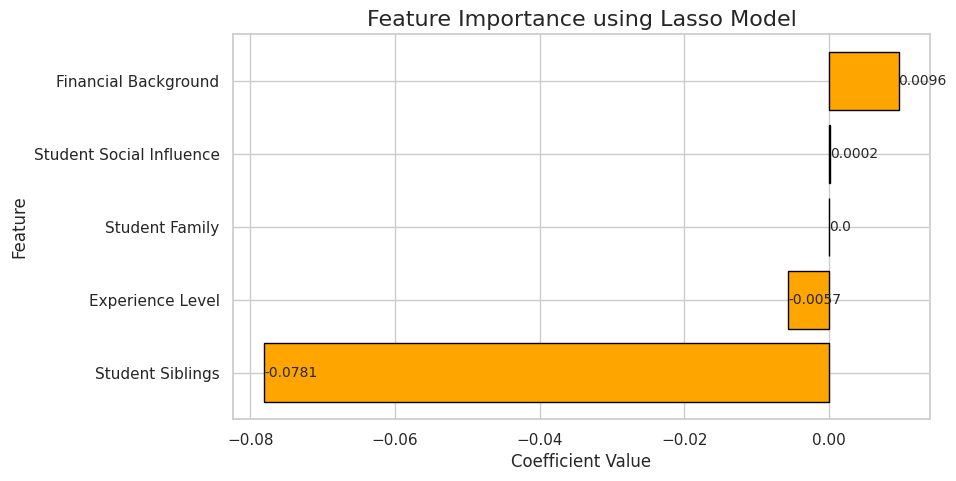

In [ ]:
plot_importance(coef,'Lasso')

This time we are going to apply Recursive Feature Elimination (RFE / Backwards) that will allow to select the most important features to keep. The base estimator used will be a Logistic Regression.

In [ ]:
# Number of features to consider
nof_list = np.arange(1, 6)

# Variables to store the optimum features
high_score = 0
nof = 0
score_list = []

# Iterating over different numbers of features
for n in range(len(nof_list)):
    # Creating a logistic regression model
    model = LogisticRegression()

    # Initializing RFE with the current number of features
    rfe = RFE(model, n_features_to_select=nof_list[n])

    # Transforming the training and validation sets based on the selected features
    X_train_rfe = rfe.fit_transform(X_train_n, y_train)
    X_val_rfe = rfe.transform(X_val_n)

    # Training the model on the selected features
    model.fit(X_train_rfe, y_train)

    # Calculating the accuracy score on the validation set
    score = model.score(X_val_rfe, y_val)
    score_list.append(score)

    # Updating variables if a higher score is achieved
    if score > high_score:
        high_score = score
        nof = nof_list[n]

# Displaying the optimum number of features and the corresponding score
print("Optimum number of features: %d" % nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.720280


Given these results, and as part of our feature selection strategy, we decide to remove the "Student Family" column (further along in the project). Although Lasso assigned it a coefficient of 0, suggesting it may not be influential, RFE further emphasized the model's performance with only 4 features. The removal aims to streamline the model while maintaining predictive accuracy. This decision is based on a combination of Lasso's feature importance and the performance optimization identified by RFE.

## - Categorical Features

Now we'll utilize the chi-squared (chi2) statistical test for feature selection on categorical variables. Chi2 assesses the independence between variables, helping identify the most significant categorical features for our model.

In [ ]:
def TestIndependence(X, y, var, alpha=0.05):
    # Flattening X and y to 1D arrays
    X = X.values.flatten()
    y = y.values.flatten()

    # Create a contingency table
    dfObserved = pd.crosstab(y, X)

    # Perform chi-squared test
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)

    # Create a DataFrame for expected values
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)

    # Check significance and provide result
    if p < alpha:
        result = "{0} is IMPORTANT for Prediction".format(var)
    else:
        result = "{0} is NOT an important predictor. (Discard {0} from the model)".format(var)
    print(result)

In [ ]:
for var in X_train_c:
    TestIndependence(X_train_c[var],y_train, var)

Program is IMPORTANT for Prediction
Student Gender is IMPORTANT for Prediction
School of Origin is IMPORTANT for Prediction
Favourite Study Element is NOT an important predictor. (Discard Favourite Study Element from the model)



With these insights, our next step involves dropping the less important feature, "Favourite Study Element," from the dataset. We aim to retain and focus on the identified impactful predictors: "Program," "Student Gender," and "School of Origin."

In [ ]:
X_train = X_train.drop(['Student Family','Favourite Study Element'],axis=1)
X_val = X_val.drop(['Student Family','Favourite Study Element'],axis=1)

# >> Encoding

Continuing in the process of this project, we plan to use techniques such as Label Encoding and One-Hot Encoding for handling categorical variables.
By applying these encoding techniques, we aim to represent categorical information in a format that machine learning models can effectively interpret, contributing to improved model performance and accuracy.

## - Binary Label Encoding

In [ ]:
# Creating an instance of LabelEncoder
le = LabelEncoder()
# Encoding the 'Student Gender' column using LabelEncoder
X_train['Student Gender'] = le.fit_transform(X_train['Student Gender'])
# Apply the same transformation to the X_val dataset
X_val['Student Gender'] = le.fit_transform(X_val['Student Gender'])
# Displaying the first few rows of the DataFrame after encoding
X_train.head()

,Program,Student Gender,Experience Level,Student Siblings,Financial Background,School of Origin,Student Social Influence
Student ID,,,,,,,
663,Magi Academy,1,47.0,0,25.5875,Mystic Academy,20
680,Magi Academy,1,36.0,0,63.1125,Eldertree Enclave,6
454,Magi Academy,1,49.0,1,63.1125,Eldertree Enclave,21
865,Witchcraft Institute,1,24.0,0,13.0000,Mystic Academy,22
620,Witchcraft Institute,1,26.0,0,10.5000,Mystic Academy,6


This code uses _LabelEncoder_ to convert categorical labels in the 'Student Gender' column into numerical representations.
Male -> 1
Female -> 0

## - One-Hot Label Encoding

Now we'll use _get_dummies_. This is function performs one-hot encoding on categorical variables, converting them into binary columns. Each category becomes a new column with binary values indicating the presence or absence of the category in each observation.

In [ ]:
# List of categorical columns
cat_cols = ['Program','School of Origin']

In [ ]:
# Performing one-hot encoding on categorical columns in the training set (X_train)
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
# Apply the same transformation to the X_val dataset
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)

In [ ]:
# Displaying the first two rows of the X_train DataFrame after one-hot encoding
X_train.head(2)

,Student Gender,Experience Level,Student Siblings,Financial Background,Student Social Influence,Program_Sorcery School,Program_Witchcraft Institute,School of Origin_Eldertree Enclave,School of Origin_Mystic Academy
Student ID,,,,,,,,,
663,1,47.0,0,25.5875,20,0,0,0,1
680,1,36.0,0,63.1125,6,0,0,1,0


In [ ]:
# Displaying the first two rows of the X_val DataFrame after one-hot encoding
X_val.head(2)

,Student Gender,Experience Level,Student Siblings,Financial Background,Student Social Influence,Program_Sorcery School,Program_Witchcraft Institute,School of Origin_Eldertree Enclave,School of Origin_Mystic Academy
Student ID,,,,,,,,,
154,1,40.5,0,14.5000,19,1,0,0,1
286,1,33.0,0,8.6625,22,1,0,1,0


## >> Correlation between features


Understanding feature correlation provides insights into how different variables relate to each other. High correlation between features may indicate redundancy, potentially leading to overfitting, while low correlation can suggest independence. Identifying and handling correlated features is crucial for model interpretability, efficiency, and avoiding multicollinearity issues. This analysis aids in selecting the most relevant features, enhancing model performance, and ensuring robust predictive capabilities.

In [ ]:
# Calculating the Spearman correlation matrix for the one-hot encoded training set (X_train)
cor = X_train.corr(method='spearman')

In [ ]:
# Function to create a heatmap for the correlation matrix
def cor_heatmap(cor):
    # Setting the size of the figure
    plt.figure(figsize=(12, 10))

    # Creating a heatmap with annotations
    sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')

    # Displaying the heatmap
    plt.show()

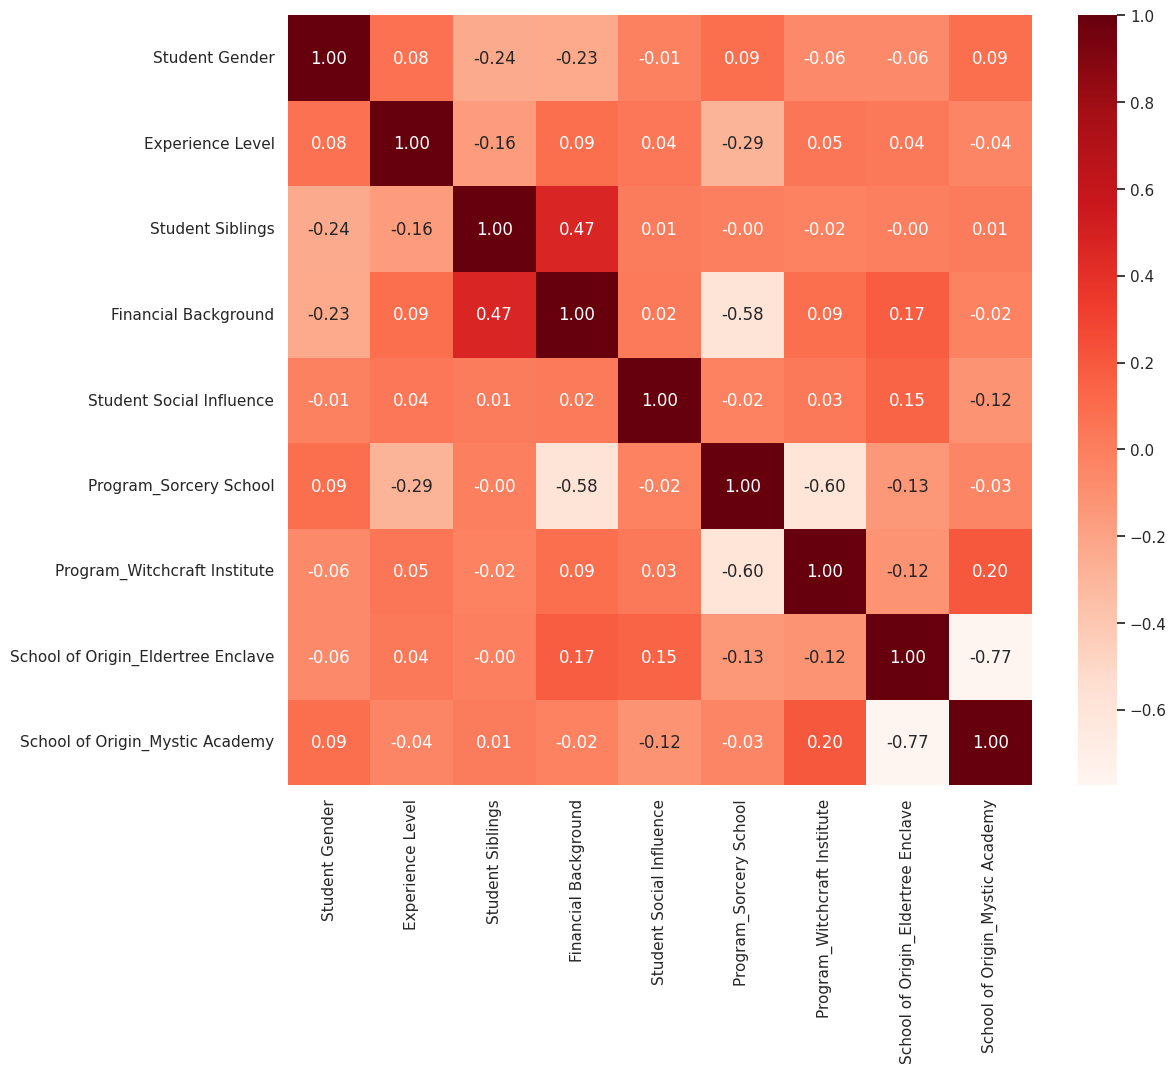

In [ ]:
cor_heatmap(cor)

In our analysis, we've observed a substantial correlation of -0.77 between two features: "School of Origin_Eldertree Enclave" and "School of Origin_Eldertree Academy" such high correlation indicates a strong linear relationship between these features, and retaining both might introduce redundancy to our model.
By eliminating one of the correlated features, we streamline our dataset, enhance model efficiency.

In [ ]:
# Dropping the column 'School of Origin_Eldertree Enclave'
X_train = X_train.drop(['School of Origin_Eldertree Enclave'], axis=1)
X_val = X_val.drop(['School of Origin_Eldertree Enclave'], axis=1)

# Model Selection

The function _evaluate_scaler_model_visualize_ systematically evaluates combinations of scalers and models using _stratified cross-validation_, visualizes the results with boxplots, and returns the best-performing scaler, model, and the associated accuracy score. It facilitates the exploration of different preprocessing strategies and model choices for a given dataset.

In [ ]:
def evaluate_scaler_model_visualize(X, y, scalers, models, cv=5, random_seed=42):
    """
    Evaluate different scalers and models using cross-validation, visualize results, and return the best scaler and model.

    Parameters:
    - X: Feature set.
    - y: Label set.
    - scalers: List of scalers to be evaluated.
    - models: List of models to be evaluated.
    - cv: Number of folds for cross-validation.
    - random_seed: Seed for random number generation.

    Returns:
    - best_scaler: Best identified scaler.
    - best_model: Best identified model.
    - best_score: Best achieved score.
    """
    # Set random seeds to make results more reproducible
    np.random.seed(random_seed)
    results = []
    # Use stratified cross-validation to maintain class distribution in each fold
    stratified_cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=random_seed)
    for scaler in scalers:
        for model in models:
            # Apply the scaler to the data
            X_scaled = scaler.fit_transform(X)
            # Initialize the model
            clf = model()
            # Evaluate the model using cross-validation
            scores = cross_val_score(clf, X_scaled, y, cv=stratified_cv, scoring='accuracy')
            # Store results for visualization
            results.append({
                'Scaler': scaler.__class__.__name__,
                'Model': model.__name__,
                'Scores': scores
            })

    # Visualize results with boxplots
    plt.figure(figsize=(14,10))
    sns.set(style="whitegrid", font_scale=1.2)

    # Rotate x-axis labels by 45 degrees
    plot = sns.boxplot(x='Model', y='Scores', hue='Scaler', data=pd.DataFrame(results).explode('Scores'))
    plt.xticks(rotation=45)

    # Improve readability and aesthetics
    plot.set_title('Cross-Validated Accuracy Scores for Different Scalers and Models', fontsize=18)
    plot.set_xlabel('Model', fontsize=16)
    plot.set_ylabel('Accuracy', fontsize=16)
    plot.legend(title='Scaler', title_fontsize='14', loc='upper right')
    plot.yaxis.grid(True)

    # Show the plot
    plt.show()

    # Find the best results
    best_result = max(results, key=lambda x: np.mean(x['Scores']))
    best_scaler = best_result['Scaler']
    best_model = best_result['Model']
    best_score = np.mean(best_result['Scores'])

    return best_scaler, best_model, best_score

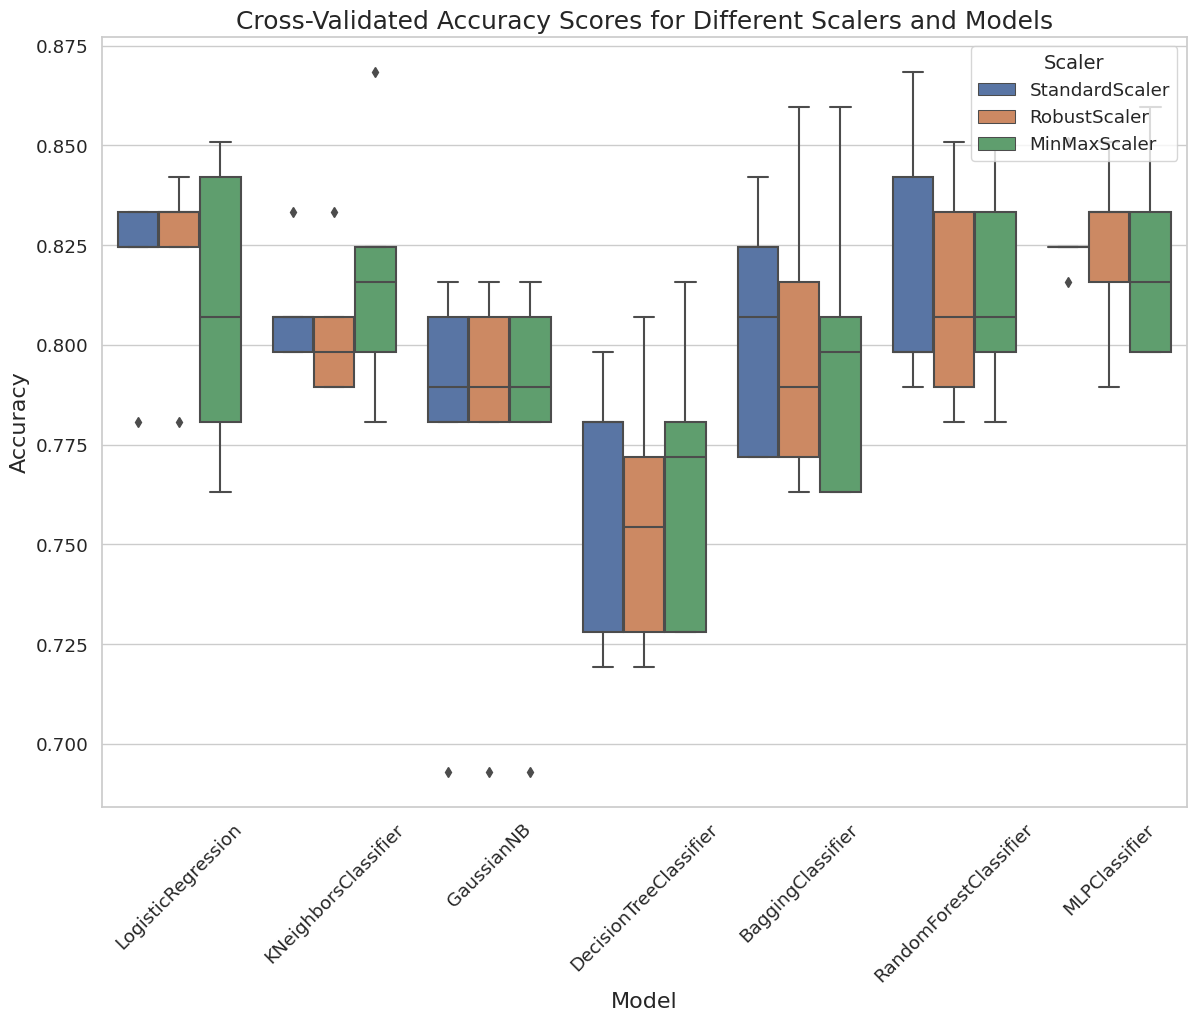

Best Scaler: StandardScaler
Best Model: MLPClassifier
Best Score: 0.8280701754385966


In [ ]:
# List of scalers to try
scalers_to_try = [StandardScaler(), RobustScaler(), MinMaxScaler()]
# List of models to try
models_to_try = [
    LogisticRegression(), KNeighborsClassifier, GaussianNB,
    DecisionTreeClassifier, BaggingClassifier, RandomForestClassifier, MLPClassifier
]

# Evaluate and visualize different scalers and models, and get the best results
best_scaler, best_model, best_score = evaluate_scaler_model_visualize(X_train, y_train, scalers_to_try, models_to_try)

# Print the results
print(f"Best Scaler: {best_scaler}")
print(f"Best Model: {best_model}")
print(f"Best Score: {best_score}")

In [ ]:
# List of columns to be scaled
Columns = ['Student Gender', 'Experience Level', 'Student Siblings', 'Financial Background',
           'Student Social Influence', 'Program_Sorcery School', 'Program_Witchcraft Institute',
           'School of Origin_Mystic Academy']

# Scaling features using StandardScaler
feat_scaler = StandardScaler()

# Apply scaling transformation to the training data
X_train[Columns] = feat_scaler.fit_transform(X_train[Columns])

# Apply the same transformation to the validation data
X_val[Columns] = feat_scaler.transform(X_val[Columns])

In [ ]:
# Displaying the first two rows of the X_train DataFrame after scaling
X_train.head(2)

,Student Gender,Experience Level,Student Siblings,Financial Background,Student Social Influence,Program_Sorcery School,Program_Witchcraft Institute,School of Origin_Mystic Academy
Student ID,,,,,,,,
663,0.726739,1.371983,-0.516807,0.143101,1.058391,-1.127349,-0.529999,0.592208
680,0.726739,0.515769,-0.516807,2.105877,-0.960725,-1.127349,-0.529999,-1.688594


Having identified the Random Forest and MLP classifiers as our top performers with default parameters, our focus now shifts to maximizing their potential through hyperparameter optimization.

## Random Forest Classifier

Our next strategic move involves delving into the exploration of optimal hyperparameter values for our Random Forest Classifier. To achieve this, we'll employ a systematic approach, individually assessing the impact of different values for the each parameter.

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 42)

In [ ]:
def return_f1score(model, X, y):
    """
    Compute F1 scores using cross-validation.

    Parameters:
    - model: The classification model to be evaluated.
    - X: Feature set.
    - y: Label set.

    Returns:
    - n_scores: Array of F1 scores obtained from cross-validation.
    """
    # Using cross_val_score to compute F1 scores with cross-validation
    n_scores = cross_val_score(model, X, y, scoring='f1', cv=cv)

    return n_scores

In [ ]:
def return_results(models, X=X_train, y=y_train):
    """
    Evaluate multiple classification models, compute F1 scores using cross-validation, and visualize the results.

    Parameters:
    - models: A dictionary where keys are model names and values are model instances.
    - X: Feature set (default is X_train).
    - y: Label set (default is y_train).

    Returns:
    - The function prints F1 scores and visualizes the results using boxplots.
    """
    results, names = [], []

    # Iterate over models
    for name, model in tqdm(models.items()):
        # Compute F1 scores using cross-validation
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

    # Visualize results with boxplots
    plt.figure(figsize=(15, 7))
    plt.boxplot(results, labels=names, showmeans=True)
    plt.xticks(fontsize=14)
    plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

>50 0.712 (0.081)
>100 0.719 (0.069)
>200 0.721 (0.071)
>300 0.721 (0.068)
>500 0.721 (0.066)
>1000 0.719 (0.066)


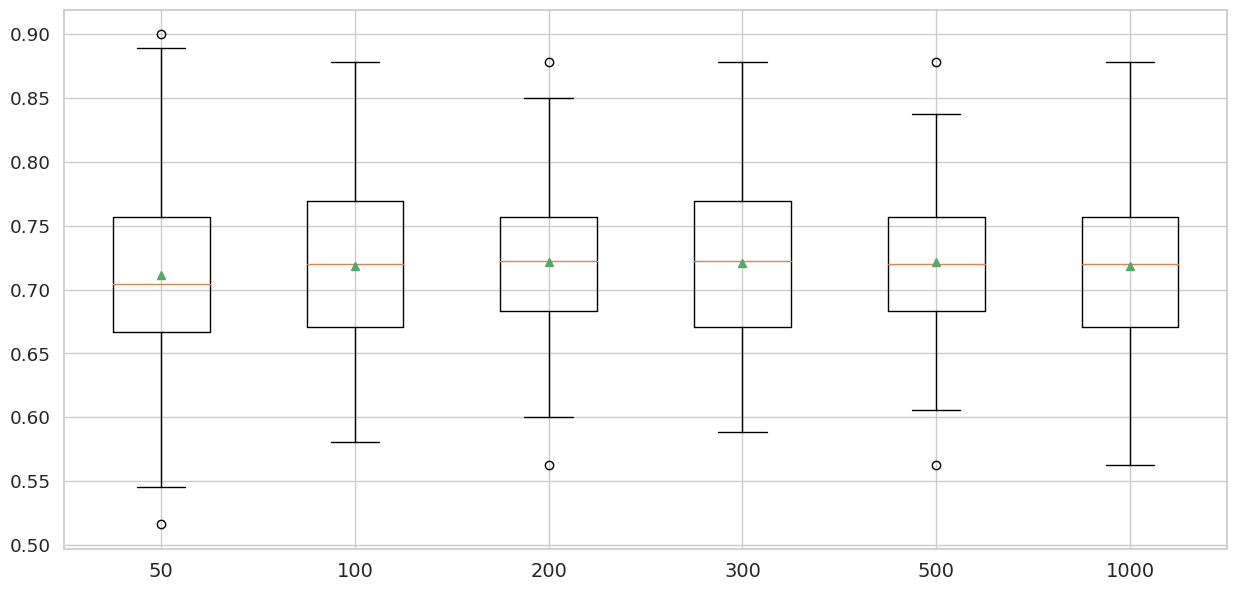

In [ ]:
'''
# Function to create Random Forest models with varying values for "n_estimators"
def get_models(values):
  # Create an empty dictionary to store models
  models = dict()

  # Iterate through each value in the input list
  for value in values:
    # Create a Random Forest model with the specified number of trees and a fixed random state
    models[str(value)] = RandomForestClassifier(n_estimators=value, random_state=5)

  # Return the dictionary of Random Forest models
  return models

# Call the get_models function with a list of "n_estimators" values
models = get_models([50, 100, 200, 300, 500, 1000])
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

Now we will use the  <span style='color:Blue'> get_models()  </span> function again to gain the same insights but for the `bootstrap` parameter with True and False as values.

  0%|          | 0/2 [00:00<?, ?it/s]

>True 0.719 (0.069)
>False 0.709 (0.065)


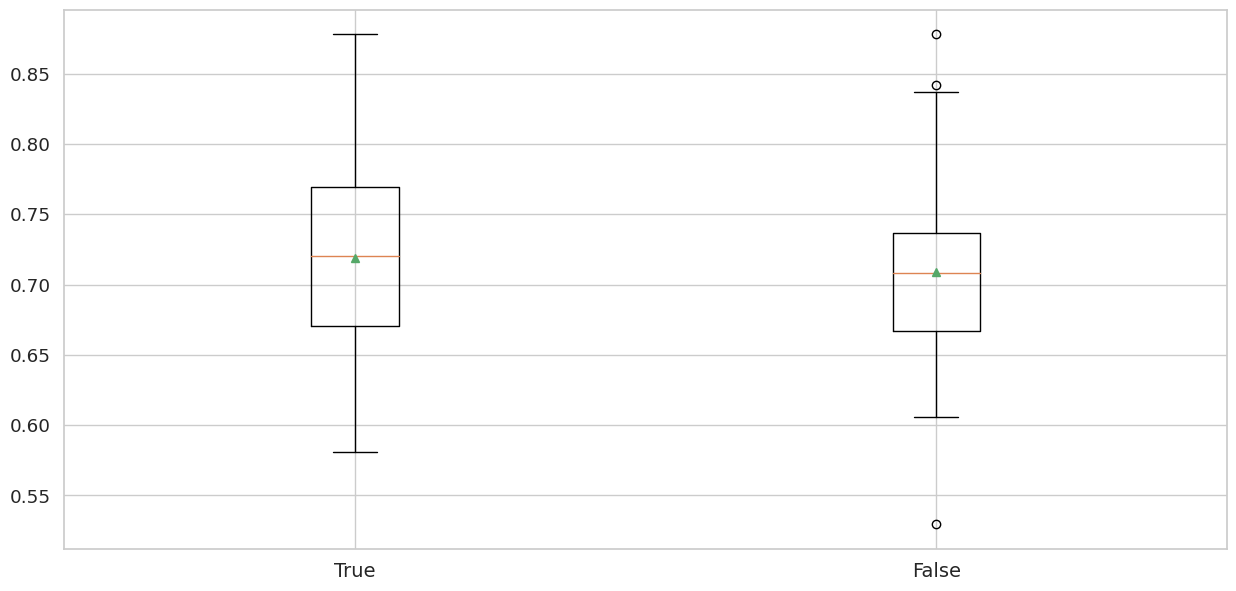

In [ ]:
'''
# Function to create Random Forest models with varying values for "bootstrap"
def get_models(values):
    # Create an empty dictionary to store models
    models = dict()

    # Iterate through each value in the input list
    for value in values:
      # Create a Random Forest model with the specified bootstrap value and a fixed random state
      models[str(value)] = RandomForestClassifier(bootstrap=value, random_state=5)

    # Return the dictionary of Random Forest models
    return models

# Call the get_models function with a list of "bootstrap" values (True, False)
models = get_models([True, False])
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

This time with `max_samples` as parameter to be evaluated and 0.2, 0.4, 0.6, 0.8 and None as parameter values.

  0%|          | 0/5 [00:00<?, ?it/s]

>0.2 0.708 (0.074)
>0.4 0.722 (0.067)
>0.6 0.724 (0.076)
>0.8 0.724 (0.073)
>None 0.719 (0.069)


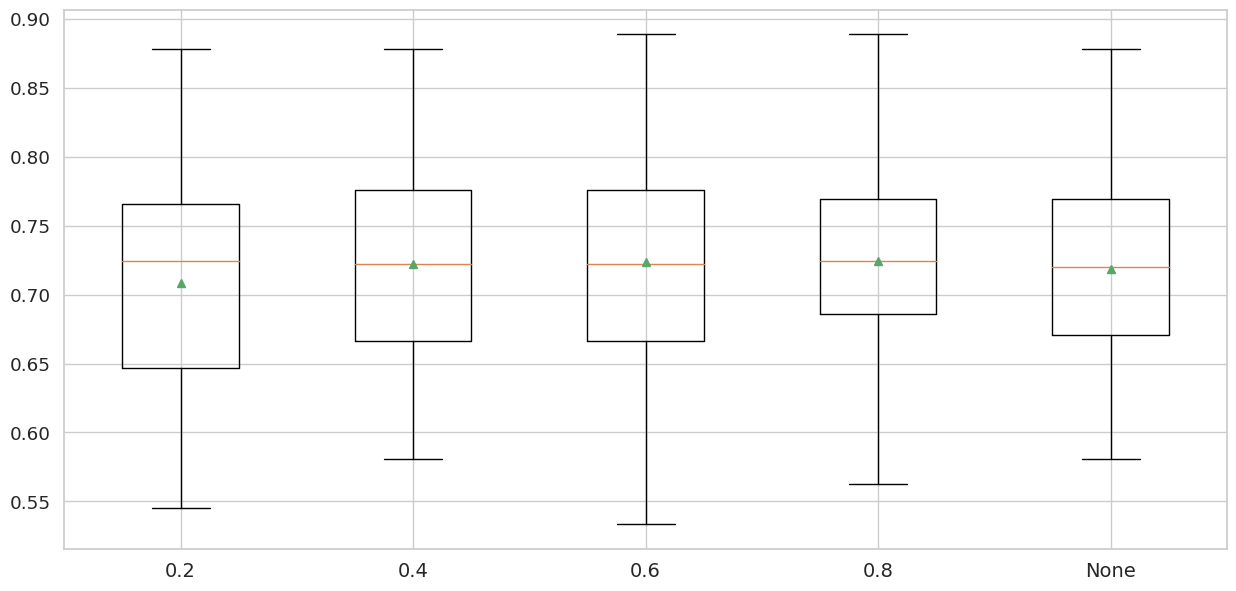

In [ ]:
'''
# Function to create Random Forest models with varying values for "max_samples"
def get_models(values):
    # Create an empty dictionary to store models
    models = dict()

    # Iterate through each value in the input list
    for value in values:
      # Create a Random Forest model with the specified "max_samples" value and a fixed random state
      models[str(value)] = RandomForestClassifier(max_samples=value, random_state=5)

    # Return the dictionary of Random Forest models
    return models

# Call the get_models function with a list of "max_samples" values (0.2, 0.4, 0.6, 0.8, None)
models = get_models([0.2, 0.4, 0.6, 0.8, None])
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

Checking now the parameter values 8, 10, 12, 15, 20, and None for `max_depth` parameter.

  0%|          | 0/6 [00:00<?, ?it/s]

>8 0.731 (0.076)
>10 0.719 (0.072)
>12 0.723 (0.067)
>15 0.720 (0.068)
>20 0.718 (0.069)
>None 0.719 (0.069)


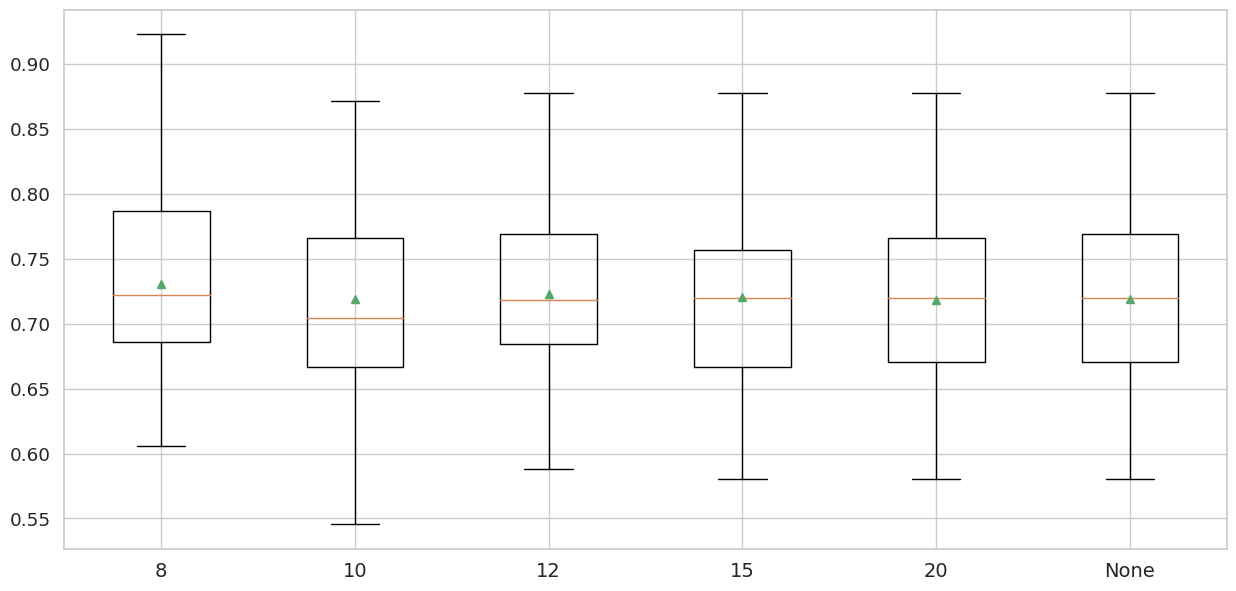

In [ ]:
'''
# Function to create Random Forest models with varying values for "max_depth"
def get_models(values):
    # Create an empty dictionary to store models
    models = dict()

    # Iterate through each value in the input list
    for value in values:
      # Create a Random Forest model with the specified "max_depth" value and a fixed random state
      models[str(value)] = RandomForestClassifier(max_depth=value, random_state=5)

    # Return the dictionary of Random Forest models
    return models

# Call the get_models function with a list of "max_depth" values (8, 10, 12, 15, 20, None)
models = get_models([8, 10, 12, 15, 20, None])
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

And finally we evaluated the f1 score of the `min_samples_leaf` parameter for the values 1, 5, 10 and 15.

  0%|          | 0/4 [00:00<?, ?it/s]

>1 0.719 (0.069)
>5 0.719 (0.067)
>10 0.697 (0.075)
>15 0.675 (0.082)


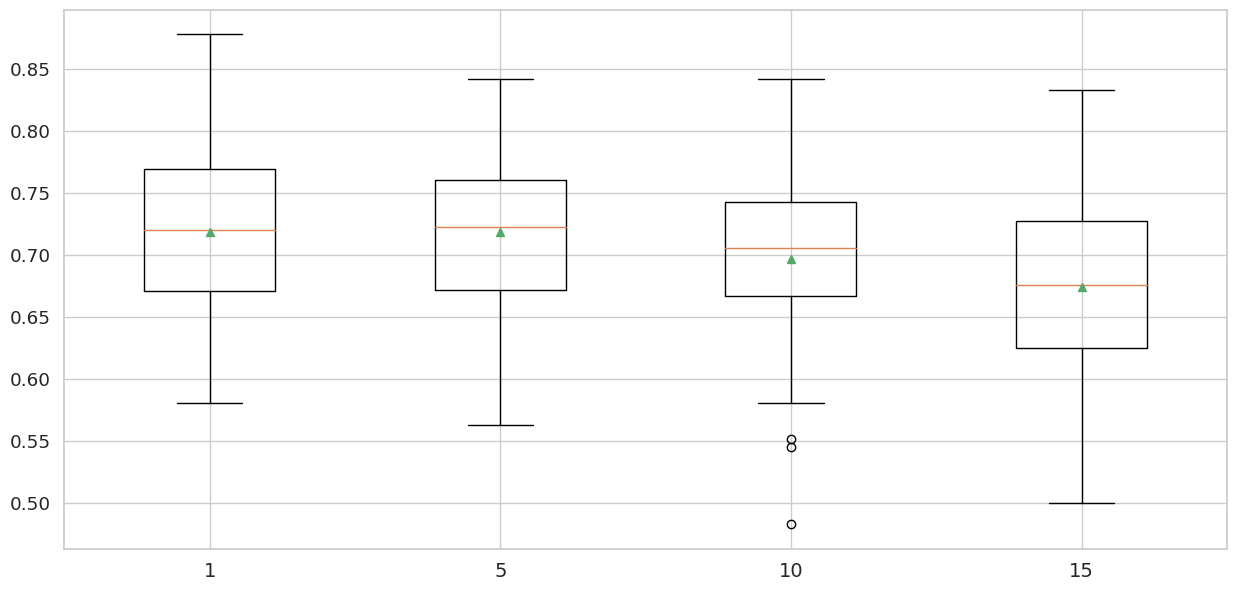

In [ ]:
'''
# Function to create Random Forest models with varying values for "min_samples_leaf"
def get_models(values):
    # Create an empty dictionary to store models
    models = dict()

    # Iterate through each value in the input list
    for value in values:
      # Create a Random Forest model with the specified "min_samples_leaf" value and a fixed random state
      models[str(value)] = RandomForestClassifier(min_samples_leaf=value, random_state=5)

    # Return the dictionary of Random Forest models
    return models

# Call the get_models function with a list of "min_samples_leaf" values (1, 5, 10, 15)
models = get_models([1, 5, 10, 15])
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

### RandomizedSearchCV
We choose first RandomizedSearchCV over GridSearchCV for efficiency. RandomizedSearchCV explores a diverse subset of hyperparameter configurations, making it computationally and time-efficient, especially in large search spaces. It strikes a balance between exploration and exploitation, potentially discovering better-performing configurations more quickly than exhaustive grid search.

This code is commented to ensure reproducibility when using random search for hyperparameter tuning.
When conducting a randomized search, the process involves randomly sampling hyperparameter values from a defined distribution.
Serves as a reference for the specific set of hyperparameters obtained during a single run

In [ ]:
'''
# Define the hyperparameters to be tuned and their associated distributions
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'max_samples' : [0.2, 0.4, 0.6, 0.8],
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Create an instance of the model
rf = RandomForestClassifier()

# Perform random search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=200, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model with the random search
random_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)
print()

# Display the best accuracy score on Train dataset
print("Best Accuracy:", random_search.best_score_)

# Evaluate performance on the validation set
validation_score = random_search.best_estimator_.score(X_val, y_val)
print("Validation Set Accuracy:", validation_score)
'''

Best Hyperparameters: {'bootstrap': True, 'max_depth': 8, 'max_samples': 0.6, 'min_samples_leaf': 2, 'n_estimators': 30}

Best Accuracy: 0.8385964912280702
Validation Set Accuracy: 0.8111888111888111


In this image, you'll find a snapshot of the parameter values crucial for the subsequent analyses, conclusions, and tests performed in our project. The rationale behind presenting these values in an image is to establish a reference point. Given that we employed randomized search earlier in the notebook, executing the entire notebook in a single run could potentially lead to variations in the parameter values.
![Alt text](https://i.postimg.cc/MGHK7RjF/image.png)

In [ ]:
RFC = RandomForestClassifier(bootstrap= True, max_depth=8,max_samples = 0.6, min_samples_leaf = 2, n_estimators = 30).fit(X_train,y_train)

In [ ]:
y_pred_train = RFC.predict(X_train)
y_pred_val= RFC.predict(X_val)

In [ ]:
# Classification report for the training set
class_report_train = classification_report(y_train, y_pred_train)

# Classification report for the validation set
class_report_val = classification_report(y_val, y_pred_val)

# Print reports
print("Classification Report for the Training Set:")
print(class_report_train)
print()

print("Classification Report for the Validation Set:")
print(class_report_val)

Classification Report for the Training Set:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       369
           1       0.89      0.77      0.83       201

    accuracy                           0.89       570
   macro avg       0.89      0.86      0.87       570
weighted avg       0.89      0.89      0.88       570


Classification Report for the Validation Set:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        92
           1       0.82      0.61      0.70        51

    accuracy                           0.81       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.81      0.81      0.80       143



The classification report for the training set indicates strong model performance, with high precision, recall, and F1-scores for both classes (0 and 1), resulting in an overall accuracy of 89%. However, when applied to the validation set, the model's accuracy slightly decreased to 81%, suggesting potential overfitting.

To address this, the next step involves applying the same steps to an MLPClassifier, aiming to improve generalization and achieve better results on unseen data.

# MLP Classifier


In the next cell, through the function <span style='color:Blue'> get_models()  </span>, we will evaluate the f1 score for different parameter values. The parameter that is being evaluated is the `hidden_layer_sizes` and the values checked are 50, 100, 200, 500, and 1000.

  0%|          | 0/5 [00:00<?, ?it/s]

>50 0.731 (0.071)
>100 0.736 (0.067)
>200 0.729 (0.070)
>500 0.724 (0.070)
>1000 0.716 (0.067)


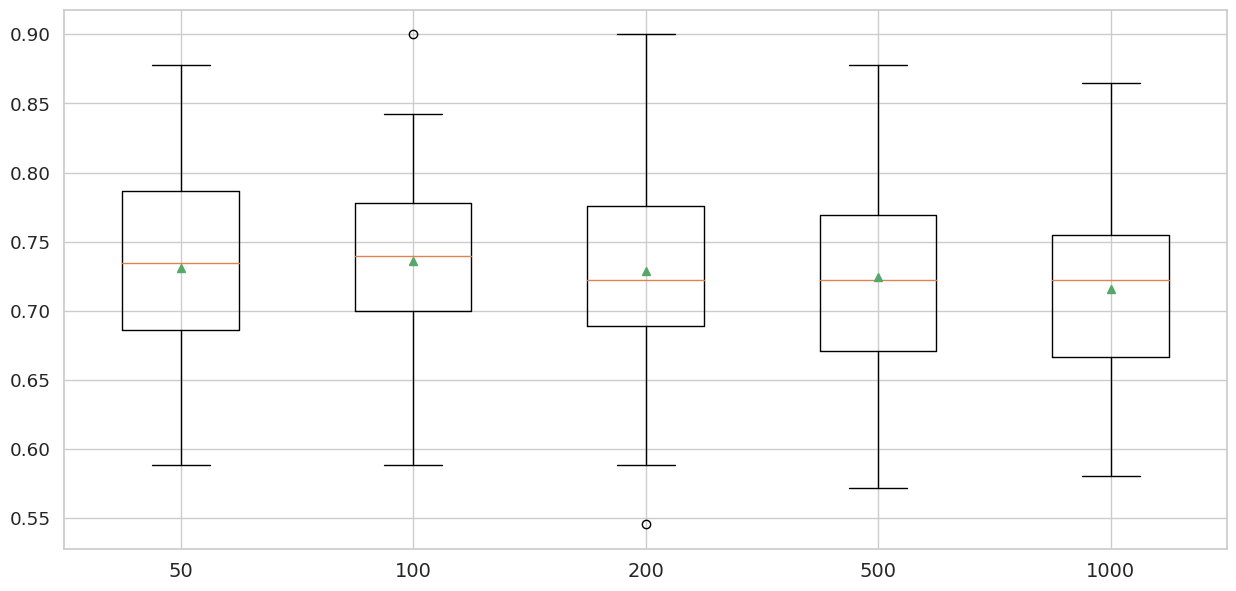

In [ ]:
'''
# Function to create MLPClassifiers with different hidden layer sizes
def get_models(values):
    models = dict()
    # Create an empty dictionary to store models
    for value in values:
        # Create an MLPClassifier with the current value as the hidden layer size and a fixed random state
        models[str(value)] = MLPClassifier(hidden_layer_sizes=value, random_state=5)
    # Return the dictionary of MLPClassifiers
    return models

# Specify a list of values representing different configurations for the number of neurons in the hidden layers
hidden_layer_sizes_list = [50, 100, 200, 500, 1000]
# Call the get_models function with a list of "hidden_layer_sizes_list" values 50, 100, 200, 500, 1000
models = get_models(hidden_layer_sizes_list)
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

Now we will use the  <span style='color:Blue'> get_models()  </span> function again to gain the same insights but for the `activation` parameter.

  0%|          | 0/3 [00:00<?, ?it/s]

>logistic 0.718 (0.079)
>tanh 0.726 (0.074)
>relu 0.736 (0.067)


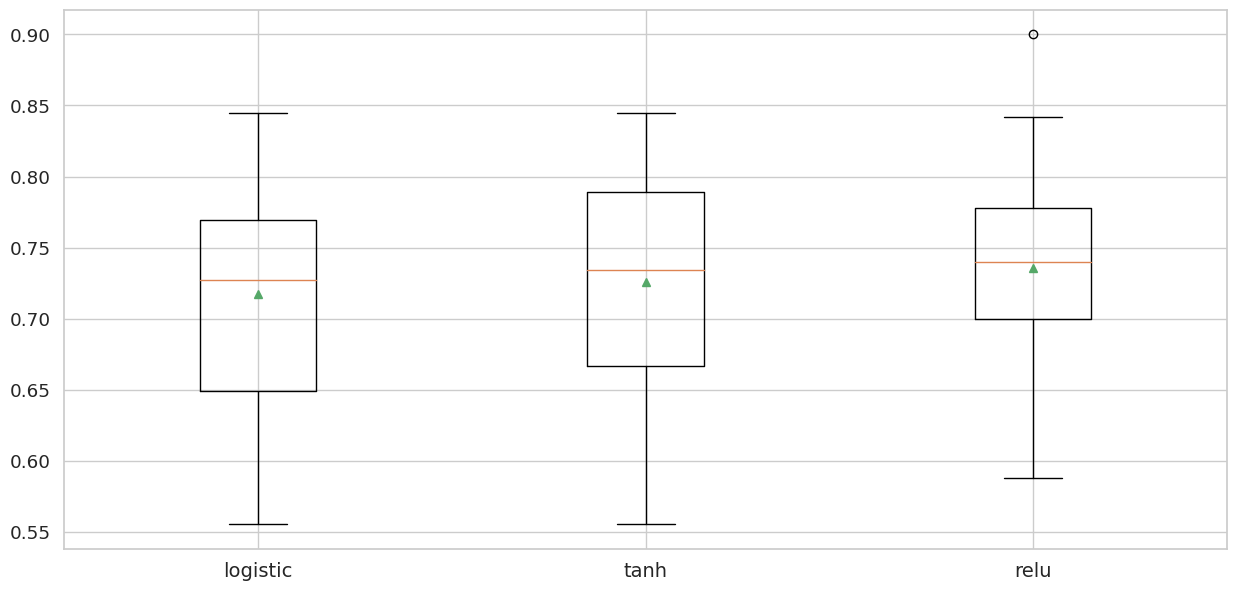

In [ ]:
'''
# Function to create MLPClassifiers with different activation functions
def get_models(values):
    models = dict()
    # Create an empty dictionary to store models
    for value in values:
        # Create an MLPClassifier with the current value as the activation function and a fixed random state
        models[value] = MLPClassifier(activation=value, random_state=5)
    # Return the dictionary of MLPClassifiers
    return models

# Specify a list of values representing different activation functions
activation_functions_list = ['logistic', 'tanh', 'relu']
# Call the get_models function with the specified list of values to obtain a dictionary of MLPClassifiers
models = get_models(activation_functions_list)
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

This time with `solver` as parameter to be evaluated and 'lbfgs', 'sgd', 'adam' as parameter values.

  0%|          | 0/3 [00:00<?, ?it/s]

>lbfgs 0.676 (0.056)
>sgd 0.717 (0.086)
>adam 0.736 (0.067)


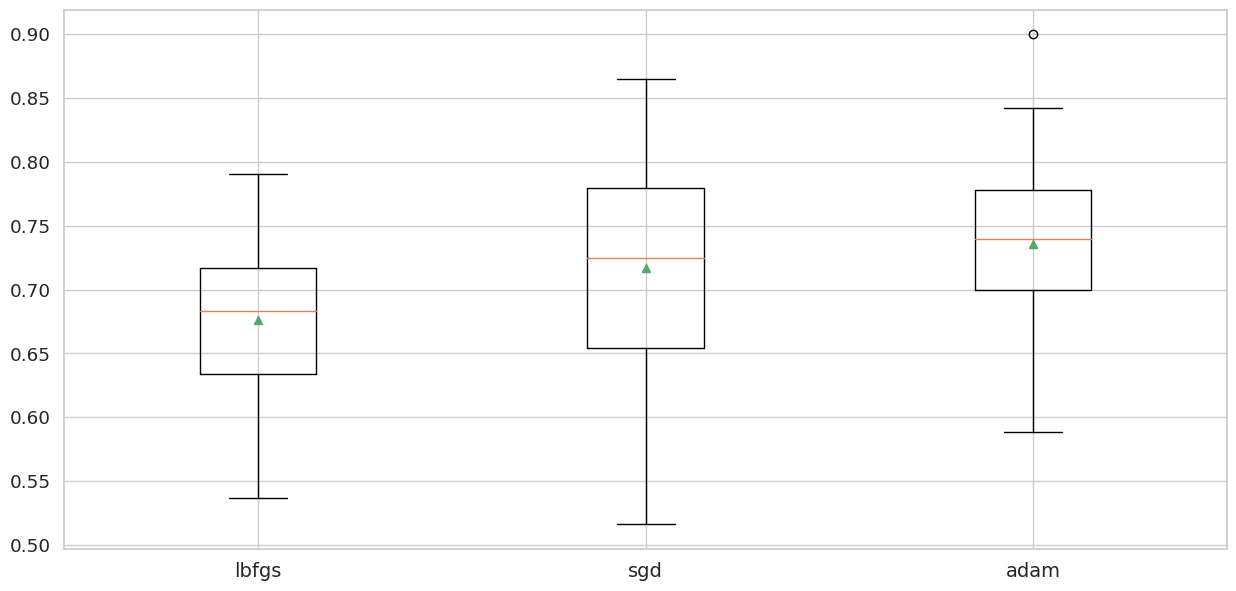

In [ ]:
'''
# Function to create MLPClassifiers with different solvers
def get_models(values):
    models = dict()
    # Create an empty dictionary to store models
    for value in values:
        # Create an MLPClassifier with the current value as the solver and a fixed random state
        models[value] = MLPClassifier(solver=value, random_state=5)
    # Return the dictionary of MLPClassifiers
    return models

# Specify a list of values representing different solver options
solver_options_list = ['lbfgs', 'sgd', 'adam']
# Call the get_models function with the specified list of values to obtain a dictionary of MLPClassifiers
models = get_models(solver_options_list)
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

Checking now the parameter values 0.0001, 0.001, 0.01, 0.1, 0.5 and None for `alpha` parameter.

  0%|          | 0/5 [00:00<?, ?it/s]

>0.0001 0.736 (0.067)
>0.001 0.736 (0.067)
>0.01 0.736 (0.067)
>0.1 0.737 (0.067)
>0.5 0.735 (0.068)


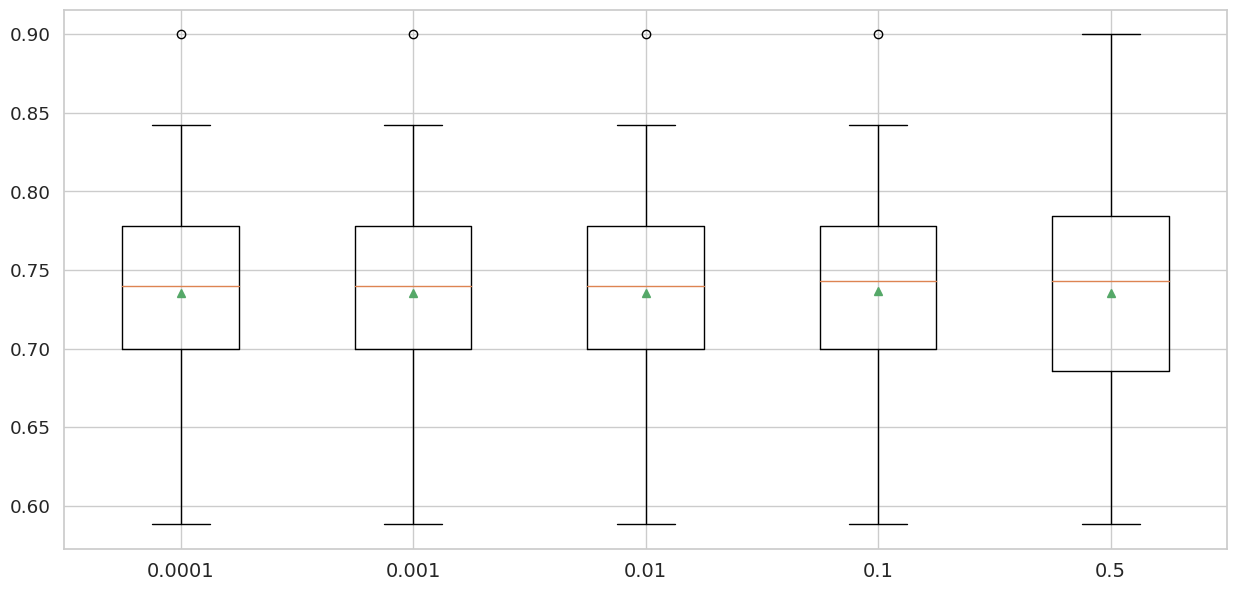

In [ ]:
'''
# Function to create MLPClassifiers with different alpha (regularization parameter) values
def get_models(values):
    models = dict()
    # Create an empty dictionary to store models
    for value in values:
        # Create an MLPClassifier with the current value as the alpha (regularization parameter) and a fixed random state
        models[str(value)] = MLPClassifier(alpha=value, random_state=5)
    # Return the dictionary of MLPClassifiers
    return models

# Specify a list of values representing different alpha (regularization parameter) options
alpha_values_list = [0.0001, 0.001, 0.01, 0.1, 0.5]
# Call the get_models function with the specified list of values to obtain a dictionary of MLPClassifiers
models = get_models(alpha_values_list)
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

Now we evaluated the f1 score of the `learning_rate` parameter for the values 'constant', 'invscaling' and 'adaptive'

  0%|          | 0/3 [00:00<?, ?it/s]

>constant 0.736 (0.067)
>invscaling 0.736 (0.067)
>adaptive 0.736 (0.067)


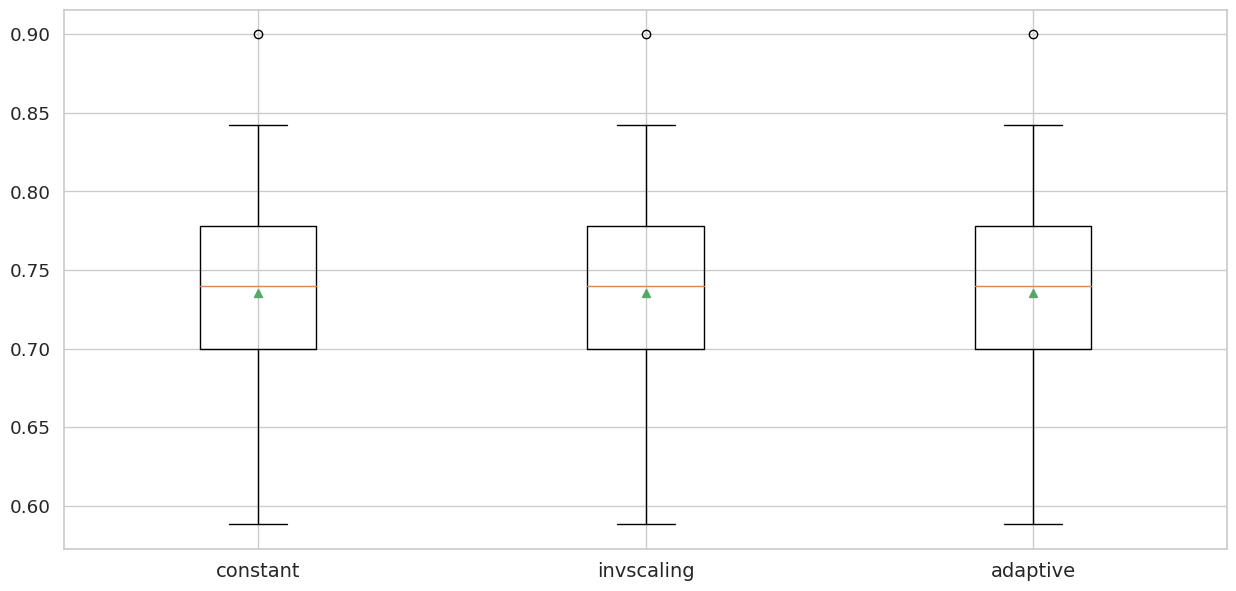

In [ ]:
'''
# Function to create MLPClassifiers with different learning rate options
def get_models(values):
    models = dict()
    # Create an empty dictionary to store models
    for value in values:
        # Create an MLPClassifier with the current value as the learning rate and a fixed random state
        models[value] = MLPClassifier(learning_rate=value, random_state=5)
    # Return the dictionary of MLPClassifiers
    return models

# Specify a list of values representing different learning rate options
learning_rate_options_list = ['constant', 'invscaling', 'adaptive']
# Call the get_models function with the specified list of values to obtain a dictionary of MLPClassifiers
models = get_models(learning_rate_options_list)
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

Now we assessed the F1 score for the max_iter parameter across the values [50, 100, 200, 500, 1000].

  0%|          | 0/5 [00:00<?, ?it/s]

>50 0.724 (0.077)
>100 0.736 (0.071)
>200 0.736 (0.067)
>500 0.716 (0.069)
>1000 0.709 (0.066)


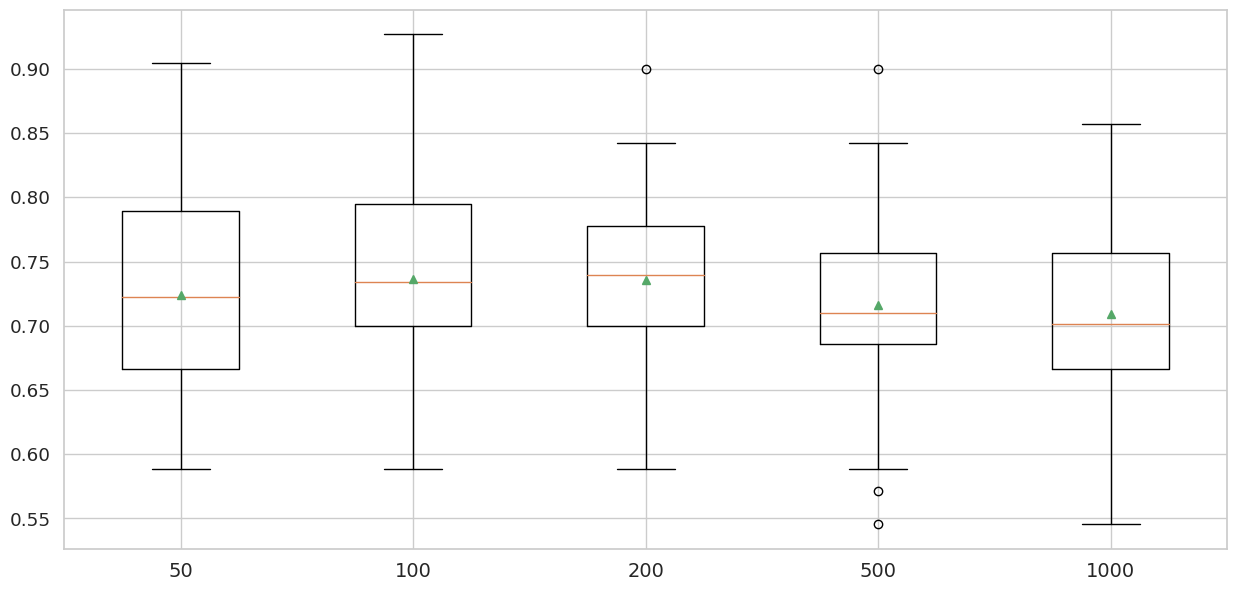

In [ ]:
'''
# Function to create MLPClassifiers with different maximum iteration values
def get_models(values):
    models = dict()
    # Create an empty dictionary to store models
    for value in values:
        # Create an MLPClassifier with the current value as the maximum iteration and a fixed random state
        models[str(value)] = MLPClassifier(max_iter=value, random_state=5)
    # Return the dictionary of MLPClassifiers
    return models

# Specify a list of values representing different maximum iteration options
max_iter_options_list = [50, 100, 200, 500, 1000]
# Call the get_models function with the specified list of values to obtain a dictionary of MLPClassifiers
models = get_models(max_iter_options_list)
# Call the return_results function to analyze and showcase the results of the models
return_results(models)
'''

## Randomized Search for hyperparameters

The Randomized Search tuning method is utilized to optimize the hyperparameters of the MLPClassifier. In this context, we have chosen to investigate a spectrum of estimators for each parameter, gauging their efficacy through the F1 score gleaned from the boxplots. The identified best values from these individual parameter evaluations will be used in the subsequent analysis.

In [ ]:
'''
# Define the hyperparameters to be fine-tuned and their respective distribution ranges
param_dist = {
    'hidden_layer_sizes': [(50,), (100,)],  # Number of neurons in each hidden layer
    'activation': [ 'tanh', 'relu'],  # Activation function
    'alpha': [0.01, 0.1],  # Regularization parameter
    'learning_rate': ['invscaling', 'adaptive'],  # Learning rate
    'max_iter': [50,100,200],
    'solver': ['sgd','adam']
}

# Create an instance of the MLPClassifier model
mlp = MLPClassifier()

# Perform a randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=200, cv=cv, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the model with the random search
random_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)
print()

# Display the best accuracy score on Train dataset
print("Best Accuracy:", random_search.best_score_)

# Evaluate performance on the validation set
validation_score = random_search.best_estimator_.score(X_val, y_val)
print("Validation Set Accuracy:", validation_score)
'''

Best Hyperparameters: {'solver': 'adam', 'max_iter': 200, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50,), 'alpha': 0.01, 'activation': 'relu'}

Best Accuracy: 0.8336842105263159
Validation Set Accuracy: 0.8181818181818182


In this image, you'll again find a snapshot of the parameter values crucial for the subsequent analyses, conclusions, and tests performed in our project.

![Alt text](https://i.postimg.cc/Jhy3TpDw/image.png)

In [ ]:
MLP = MLPClassifier(activation = 'relu', alpha= 0.01, hidden_layer_sizes= (50,), learning_rate= 'invscaling', max_iter= 200, solver= 'adam').fit(X_train, y_train)

In [ ]:
m_y_pred_train = MLP.predict(X_train)
m_y_pred_val= MLP.predict(X_val)

In [ ]:
# Classification report for the training set
class_report_train = classification_report(y_train, m_y_pred_train)

# Classification report for the validation set
class_report_val = classification_report(y_val, m_y_pred_val)

# Print reports
print("Classification Report for the Training Set:")
print(class_report_train)
print()

print("Classification Report for the Validation Set:")
print(class_report_val)


Classification Report for the Training Set:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       369
           1       0.86      0.67      0.75       201

    accuracy                           0.84       570
   macro avg       0.85      0.80      0.82       570
weighted avg       0.85      0.84      0.84       570


Classification Report for the Validation Set:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        92
           1       0.82      0.63      0.71        51

    accuracy                           0.82       143
   macro avg       0.82      0.78      0.79       143
weighted avg       0.82      0.82      0.81       143



Both classifiers exhibit similar performance, with Random Forest slightly outperforming in most metrics. Random Forest has a slightly higher overall accuracy in the training set (88% compared to 84%), but both networks show similar performance.

The current results may indicate the presence of overfitting, as there is a noticeable difference between the performance on the training and validation sets. To address this issue and enhance model generalization, we will seek to improve the models, which has demonstrated superior performance.

We will attempt to enhance the Random Forest and MLP using the grid search technique with a variety of values for its hyperparameters. Specifically, our focus will be on optimizing the models for recall instead of accuracy, as recall is the metric we aim to improve in our model. By prioritizing recall, we aim to minimize false negatives and enhance the model's ability to capture instances of the positive class.

# Grid Search Random Forest

In [ ]:
'''
# Define the hyperparameters for the grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='recall')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best-found hyperparameters
best_params = grid_search.best_params_

# Create a new classifier using the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Train the final model on the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the train data
y_pred_train = best_rf_classifier.predict(X_train)

# Make predictions on the validation data
y_pred_val = best_rf_classifier.predict(X_val)

# Classification report for the training set
class_report_train = classification_report(y_train, y_pred_train)

# Classification report for the validation set
class_report_val = classification_report(y_val, y_pred_val)

# Print reports
print("Classification Report for the Training Set:")
print(class_report_train)
print()

print("Classification Report for the Validation Set:")
print(class_report_val)
'''

Classification Report for the Training Set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       0.99      0.91      0.95       201

    accuracy                           0.97       570
   macro avg       0.97      0.95      0.96       570
weighted avg       0.97      0.97      0.97       570


Classification Report for the Validation Set:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        92
           1       0.85      0.65      0.73        51

    accuracy                           0.83       143
   macro avg       0.84      0.79      0.81       143
weighted avg       0.83      0.83      0.83       143



Upon reviewing the classification reports of the model above, it seems our model might be overfitting. The high precision and recall in the training set (0.95/0.99 and 1.00/0.91) indicate a strong fit to that data. However, the drop in performance in the validation set (0.83 accuracy) suggests challenges in generalizing to new data.

# Grid Search MLP

In [ ]:
'''
# Define the hyperparameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create the MLP classifier
mlp_classifier = MLPClassifier(random_state=42, max_iter=500)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=5, scoring='recall')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best-found hyperparameters
best_params = grid_search.best_params_

# Create a new classifier using the best hyperparameters
best_mlp_classifier = MLPClassifier(random_state=42, max_iter=500, **best_params)

# Train the final model on the training data
best_mlp_classifier.fit(X_train, y_train)

# Make predictions on the train data
y_pred_train = best_mlp_classifier.predict(X_train)

# Make predictions on the validation data
y_pred_val = best_mlp_classifier.predict(X_val)

# Classification report for the training set
class_report_train = classification_report(y_train, y_pred_train)

# Classification report for the validation set
class_report_val = classification_report(y_val, y_pred_val)

# Print reports
print("Classification Report for the Training Set:")
print(class_report_train)
print()

print("Classification Report for the Validation Set:")
print(class_report_val)
'''

Classification Report for the Training Set:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       369
           1       0.77      0.70      0.73       201

    accuracy                           0.82       570
   macro avg       0.80      0.79      0.80       570
weighted avg       0.82      0.82      0.82       570


Classification Report for the Validation Set:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        92
           1       0.72      0.67      0.69        51

    accuracy                           0.79       143
   macro avg       0.77      0.76      0.77       143
weighted avg       0.79      0.79      0.79       143



The results indicate consistent performance of the MLPClassifier model on both the training and validation sets. In the training set, the model achieves an overall accuracy of 82%, with a weighted F1-score of 0.82. Class 0 shows a precision of 84%, indicating effective classification for that class. For Class 1, the precision is 77%, reflecting solid but slightly lower performance.

On the validation set, the model maintains a global accuracy of 79%, with a weighted F1-score of 0.79. Once again, Class 0 exhibits a precision of 82%, showcasing reliable classification. For Class 1, the precision is 72%, suggesting a reasonably good performance.

The similarity between the training and validation metrics suggests that the model is likely not overfitting, making it a favorable candidate for consideration.

# FINAL MODEL CHOICE

Upon scrutinizing various models developed during our experimentation phase, we now face the decision of selecting the optimal model for our admission prediction project. Two contenders have emerged from the comprehensive search for optimal hyperparameters: the Random Forest, constructed through randomized search, and the MLP, fine-tuned using grid search.

In [ ]:
# RandomForestClassifier Model
RFC = RandomForestClassifier(bootstrap=True, max_depth=8, max_samples=0.6, min_samples_leaf=2, n_estimators=191)
RFC.fit(X_train, y_train)
y_pred_rfc = RFC.predict(X_val)

# MLPClassifier Model
MLP = best_mlp_classifier
MLP.fit(X_train, y_train)
y_pred_mlp = MLP.predict(X_val)

# Evaluation for RandomForestClassifier
print("Random Forest Classifier:")
print(classification_report(y_val, y_pred_rfc))
print("Accuracy:", accuracy_score(y_val, y_pred_rfc))
print("AUC:", metrics.roc_auc_score(y_val, RFC.predict_proba(X_val)[:, 1]))

# Evaluation for MLPClassifier
print("\nMLP Classifier:")
print(classification_report(y_val, y_pred_mlp))
print("Accuracy:", accuracy_score(y_val, y_pred_mlp))
print("AUC:", metrics.roc_auc_score(y_val, MLP.predict_proba(X_val)[:, 1]))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        92
           1       0.80      0.63      0.70        51

    accuracy                           0.81       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.81      0.81      0.81       143

Accuracy: 0.8111888111888111
AUC: 0.8810741687979541

MLP Classifier:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        92
           1       0.72      0.67      0.69        51

    accuracy                           0.79       143
   macro avg       0.77      0.76      0.77       143
weighted avg       0.79      0.79      0.79       143

Accuracy: 0.7902097902097902
AUC: 0.8503836317135549



After careful consideration of the evaluation metrics for both models in the context of our admission prediction project, we have decided to proceed with the Random Forest Classifier as our final model. The decision is based on the following key observations:

The Random Forest Classifier demonstrates superior performance in terms of accuracy, precision, recall, and AUC compared to the MLP Classifier. Specifically, it achieves a higher accuracy and precision for predicting admission (class 1), indicating a better ability to correctly identify students who will be admitted to the school. The higher AUC also suggests improved overall discrimination between admitted and non-admitted students.

Given the nature of our project, where the goal is to accurately predict whether a student will be admitted or not the Random Forest Classifier aligns well with our objectives, offering a balanced trade-off between accuracy, precision, and overall discriminatory power.

# TEST DATASET

In [ ]:
# Importing the Test dataset
test_df = pd.read_csv('Project_test_dataset.csv')

In [ ]:
# Setting 'Student ID' as the index for the testing dataset
test_df.set_index('Student ID', inplace=True)

In [ ]:
dataframe_summary(test_df)

-------------------------------------------------------------------------------------------------------------------------------------------------
SHAPE of Dataset -----------------------------------------------------------------------------------------------------------------------
(176, 10)
-------------------------------------------------------------------------------------------------------------------------------------------------
DATA TYPES of Dataset ------------------------------------------------------------------------------------------------------------------
Program                      object
Student Gender               object
Experience Level            float64
Student Siblings              int64
Student Family                int64
Financial Background        float64
School Dormitory             object
School of Origin             object
Student Social Influence      int64
Favourite Study Element      object
dtype: object
--------------------------------------------------

In [ ]:
#Test DATASET
# Looping through each column in the list of numerical columns
for column in num_cols:
    # Checking if outliers exist in the current column using default quantiles (q1=0.25, q3=0.75)
    check_if_outlier_exists(test_df, column)

Experience Level : 4 outliers exist based on Q1=0.25 and Q3=0.75
Student Siblings : 9 outliers exist based on Q1=0.25 and Q3=0.75
Student Family : 4 outliers exist based on Q1=0.25 and Q3=0.75
Financial Background : 15 outliers exist based on Q1=0.25 and Q3=0.75
Student Social Influence : No Outlier based on Q1=0.25 and Q3=0.75


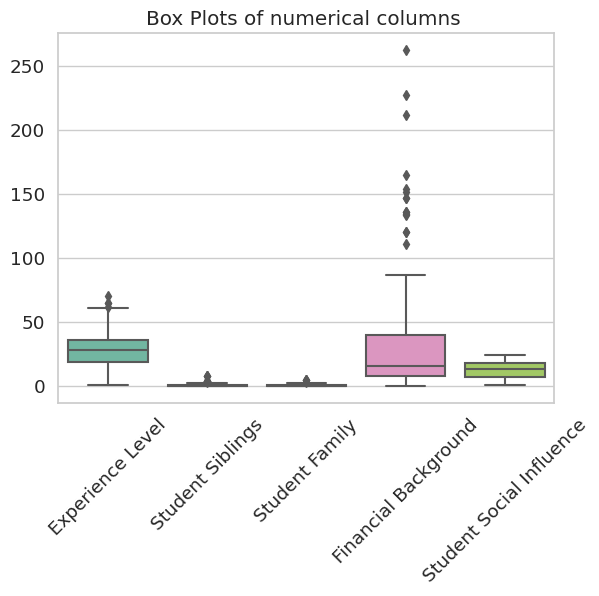

In [ ]:
# Create a new figure
plt.figure()
# Create a boxplot for each numerical variable in the dataset
sns.boxplot(data=test_df[num_cols], palette="Set2")
# Set the title of the plot
plt.title('Box Plots of numerical columns ')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Display the plot
plt.show()

In [ ]:
test_df.isnull().sum()

Program                       0
Student Gender                0
Experience Level             31
Student Siblings              0
Student Family                0
Financial Background          0
School Dormitory            127
School of Origin              0
Student Social Influence      0
Favourite Study Element       0
dtype: int64

In [ ]:
# Apply the same transformation's of the X_train to the testing dataset
test_df.drop('School Dormitory', axis=1, inplace=True)
test_df['Experience Level'] = imputer.transform(test_df[['Experience Level']])
test_df['Student Gender'] = le.fit_transform(test_df['Student Gender'])
test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True)
# Scaling features using StandardScaler
test_df[Columns] = feat_scaler.fit_transform(test_df[Columns])
test_df = test_df.drop(['School of Origin_Eldertree Enclave'], axis=1)
test_df = test_df.drop(['Student Family','Favourite Study Element'],axis=1)

In [ ]:
test_df.isnull().sum()

Student Gender                     0
Experience Level                   0
Student Siblings                   0
Financial Background               0
Student Social Influence           0
Program_Sorcery School             0
Program_Witchcraft Institute       0
School of Origin_Mystic Academy    0
dtype: int64

# FINAL MODEL AND KAGGLE SUBMISSION

In [ ]:
Final_model = RandomForestClassifier(bootstrap=True, max_depth=8, max_samples=0.6, min_samples_leaf=2, n_estimators=30).fit(X_train,y_train)

In [ ]:
label_final = Final_model.predict(test_df)

In [ ]:
df = pd.DataFrame(label_final, columns=['Admitted in School'])

# Adiciona a coluna 'Student ID' ao DataFrame df
df['Student ID'] = test_df.index

# Define 'Student ID' como o índice do DataFrame df
df.set_index('Student ID', inplace=True)

# Exibir o DataFrame resultante
df

,Admitted in School
Student ID,
836,1
323,1
117,0
444,1
619,1
...,...
21,0
366,0
890,0


In [ ]:
df['Admitted in School'].value_counts()

0    116
1     60
Name: Admitted in School, dtype: int64

In [ ]:
df.to_csv('Predictions.csv')